<a href="https://colab.research.google.com/github/AlexMa123/DCNN-SHHS/blob/main/Demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Automatic sleep-stage classification of heart rate and actigraphy data using deep and transfer learning approaches

This notebook serves as a guide to train the neural network that has been presented in the research article titled **"Automatic sleep-stage classification of heart rate and actigraphy data using deep and transfer learning approaches"** using the SHHS dataset.

In [8]:
# import packages
import h5py
import matplotlib.pyplot as plt
import numpy as np

## SHHS Dataset

The [Sleep Heart Health Study (SHHS)](https://sleepdata.org/datasets/shhs) is a multi-center cohort study implemented by the National Heart Lung & Blood Institute to determine the cardiovascular and other consequences of sleep-disordered breathing. 

### Download Dataset

In [1]:
!wget "https://onedrive.live.com/download?cid=45D5A10F94E33861&resid=45D5A10F94E33861%21248707&authkey=AKRa5kb3XFj4G-o" -O shhs_dataset.h5

--2023-05-08 10:50:29--  https://onedrive.live.com/download?cid=45D5A10F94E33861&resid=45D5A10F94E33861%21248707&authkey=AKRa5kb3XFj4G-o
Resolving onedrive.live.com (onedrive.live.com)... 13.107.42.13
Connecting to onedrive.live.com (onedrive.live.com)|13.107.42.13|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://m10oca.db.files.1drv.com/y4mNneTO-r-dc5uUtTreUekqPDM7A-HpDdm4TNYl0ebilUco7Y9opNb837zTikHXPhe2BQ6FVuYNqhUb3AmRxSoBXqDIzhQoMsa5Ue4ze-P8g-WSSpyZhBj6BIMqYqKq1-4CApC530jXjFEozzQyRz108pL-Y7Qkpw5qWcu7yzfijK2OuVvkybN3LxHgEgJSxQlSSMZ7sShcH6zIyAwVGwysw/SHHS_dataset.h5?download&psid=1 [following]
--2023-05-08 10:50:30--  https://m10oca.db.files.1drv.com/y4mNneTO-r-dc5uUtTreUekqPDM7A-HpDdm4TNYl0ebilUco7Y9opNb837zTikHXPhe2BQ6FVuYNqhUb3AmRxSoBXqDIzhQoMsa5Ue4ze-P8g-WSSpyZhBj6BIMqYqKq1-4CApC530jXjFEozzQyRz108pL-Y7Qkpw5qWcu7yzfijK2OuVvkybN3LxHgEgJSxQlSSMZ7sShcH6zIyAwVGwysw/SHHS_dataset.h5?download&psid=1
Resolving m10oca.db.files.1drv.com (m10oca.db.files.

## Data structure

The dataset created by us only save the 4 Hz and sleep stages.

![RR interval](https://www.researchgate.net/publication/265461491/figure/fig1/AS:214125746626560@1428062964655/A-typical-ECG-signal-showing-the-RR-interval.png)

The sleep stages is saved as interger numbers:

|number|stage|
|------|-----|
|  0   | Wake|
|  1   | N1  |
|  2   | N2  |
|  3   | N3  |
|  5   | REM |



In [3]:

shhs_dataset = h5py.File("./shhs_dataset.h5", 'r')

# where the rris are saved
shhs_dataset['rri']
# where the sleep stages are saved
shhs_dataset['slp']

# The patients' id
patients = list(shhs_dataset['rri'].keys())
print(patients)

['200001_1', '200002_1', '200003_1', '200004_1', '200005_1', '200006_1', '200007_1', '200008_1', '200009_1', '200010_1', '200011_1', '200012_1', '200013_1', '200014_1', '200015_1', '200016_1', '200017_1', '200018_1', '200019_1', '200020_1', '200021_1', '200022_1', '200023_1', '200024_1', '200025_1', '200026_1', '200027_1', '200028_1', '200029_1', '200030_1', '200031_1', '200032_1', '200033_1', '200034_1', '200035_1', '200036_1', '200037_1', '200038_1', '200039_1', '200040_1', '200041_1', '200042_1', '200043_1', '200044_1', '200045_1', '200046_1', '200047_1', '200048_1', '200049_1', '200050_1', '200051_1', '200052_1', '200053_1', '200054_1', '200055_1', '200056_1', '200057_1', '200058_1', '200059_1', '200060_1', '200061_1', '200062_1', '200063_1', '200064_1', '200065_1', '200066_1', '200067_1', '200069_1', '200070_1', '200071_1', '200072_1', '200073_1', '200074_1', '200075_1', '200076_1', '200077_1', '200077_2', '200078_1', '200078_2', '200079_1', '200079_2', '200080_1', '200080_2', '20

To load the patient 200080's rri and sleep stage, one should use 

In [19]:
freq_rri = shhs_dataset['rri'].attrs['freq']
print(f"The frequency of RR interval is {freq_rri}")

The frequency of RR interval is 4


In [13]:
# 200080_1 means the first night recording from patient 200001
rri_tmp = shhs_dataset['rri']['200080_1'][:] # rri_tmp is an array of data
slp_tmp = shhs_dataset['slp']['200080_1'][:]

Text(0, 0.5, 'RRI/s')

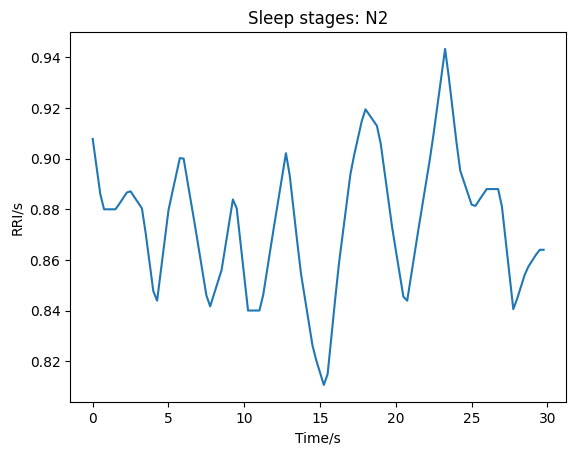

In [16]:
num2stage = {
    0: 'wake',
    1: 'N1',
    2: 'N2',
    3: 'N3',
    5: 'REM'
}

# plot the ith epoch
i = 13
plt.figure()
plt.plot(np.arange(0, 30, 1 / 4), rri_tmp[i * 30 * 4: (i + 1) * 30 * 4])
plt.title(f"Sleep stages: {num2stage[slp_tmp[i]]}")
plt.xlabel("Time/s")
plt.ylabel("RRI/s")